### Mini Project

The Notebook is a analysis of quantitative data set and the data set is "Big_Mart_Sales.csv".

Name - Anuj Rawat, sem-4, university roll- 2013266

### Content in notebook

The Notebook is divided into below modules:

<ul> 1)Exploratory Data Analysis</ul>
<ul>2) Data Preparation</ul>
<ul>3) Predictive Modeling</ul>
<ul>4) The various implementation asked to be done</ul>



### Let’s look at the steps that we will follow in this notebook.

We will handle this problem in a structured way. We will be following the table of content given below.

<ul> 1).Problem Statement</ul>
<ul> 2).Hypothesis Generation</ul>
<ul> 3).Loading Packages and Data</ul>
<ul> 4).Data Structure and Content</ul>
<ul> 5).Exploratory Data Analysis</ul>
<ul> 6).Univariate Analysis</ul>
<ul> 7).Bivariate Analysis</ul>
<ul> 8).Missing Value Treatment</ul>
<ul> 9).Feature Engineering</ul>
<ul> 10).Encoding Categorical Variables</ul>
<ul> 11).Label Encoding</ul>
<ul> 12).One Hot Encoding</ul>
<ul> 13).PreProcessing Data</ul>
<ul> 14).Modeling</ul>
<ul> 15).Linear Regression</ul>
<ul> 16).Anovo</ul>

## The problem statement -

#### The data of BigMart sales is collected. The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store.


## Hypotheses

### Store perspective Hypotheses

<ul><li><b>City type</b>: Stores located in Tier 1 cities should have higher sales because of the higher income levels of people there.</li>

<li><b>Population Density</b>: Stores located in densely populated areas should have higher sales because of more demand.</li>

<li><b>Store Capacity</b>: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.</li>

<li><b>Competitors</b>: Stores having similar establishments nearby should have less sales because of more competition.</li>

<li><b>Location</b>: Stores located within popular marketplaces should have higher sales because of better access to customers</li>

### Product perspective Hypotheses


<ul><li><b>Brand</b>: Branded products should have higher sales because of higher trust in the customer.</li>

<li><b>Packaging</b>: Products with good packaging can attract customers and sell more.</li>

<li><b>Utility</b>: Daily use products should have a higher tendency to sell as compared to the specific use products.</li>


### Customer perspective Hypotheses

<li><b>Job Profile</b>: Customer working at executive levels would have higher chances of purchasing high amount products as compared to customers working at entry or mid senior level.</li>

<li><b>Family Size</b>: More the number of family members, more amount will be spent by a customer to buy products.</li>



Disclaimer : Please note that this is a infinite list. You can come up with more hypotheses of your own.

### Loading Packages

In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

### Data
we have 2 CSV files — Train, Test. Both are of Big_Mart_Sales
<ul><li>The Train file contains  independent variables and  target variable, i.e., Item_Outlet_Sales.</li>
<li>The Test file also contains the same set of independent variables, but there is no target variable because that is what we have to predict.</li></ul>

### Reading Data

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

We should understand our raw data thoroughly, i.e., we should explore the no. of features/columns and rows, datatype of the features, feature names and so on. It helps in working with the data in the next stages. A good analyst is one  who know his the features of his data and depend less on tools.

### Dimensions of Data
Let’s quicky check the dimensions of our data, i.e., columns and rows.

In [3]:
train.shape,test.shape

((8523, 12), (5681, 11))

Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [4]:
train_original=train.copy() 
test_original=test.copy()

### Features of Data
This is a glance over the feature names of train and test datasets.

In [5]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

As we can see, there are 4 numeric and 7 categorical variables.

## ........................................................................................................................................................
After understanding the dimensions and properties of data, we have to explore the data visually. It helps us in understanding the nature of data in terms of distribution of the individual variables/features, finding missing values, relationship with other variables and many other things.

We need to predict Item_Outlet_Sales for given test data

lets first merge the train and test data for Exploratory Data Analysis



In [6]:
train['source'] = 'train'
# test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [7]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

### All categorical variables

In [8]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


### All continuous

In [9]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700


In [10]:
# The number of shop open in various year

data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

Let’s start with univariate Analysis. It involves exploring variables individually. Visualize the continuous variables using histograms and categorical variables using bar plots.

###  Continuous Variable
Since our target variable is continuous, we can visualise it by plotting its histogram.

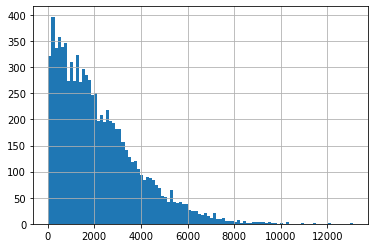

In [11]:
train['Item_Outlet_Sales'].hist(bins = 100);

As you can see, it is a right skewd variable and would need some data transformation to treat its skewness.

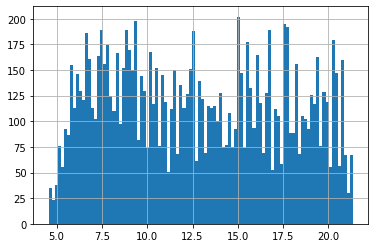

In [12]:
data['Item_Weight'].hist(bins = 100);

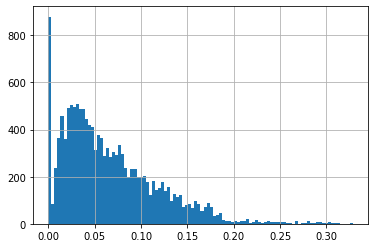

In [13]:
data['Item_Visibility'].hist(bins = 100)

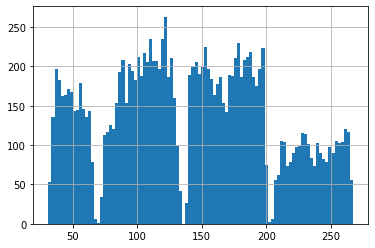

In [14]:
data['Item_MRP'].hist(bins = 100)

#### Observations

There seems to be no clear-cut pattern in Item_Weight.
Item_Visibility is right-skewed and should be transformed to curb its skewness.
We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.

###  categorical variables

Now we’ll try to explore and gain some insights from the categorical variables. A categorical variable or feature can have only a finite set of values.

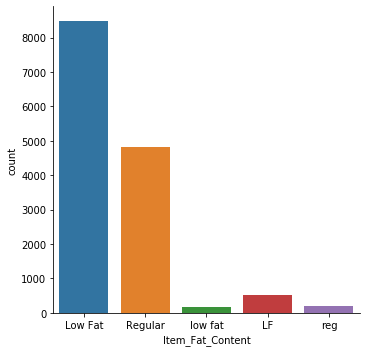

In [15]:
import seaborn as sns
sns.catplot(x="Item_Fat_Content", kind="count", data=data);

In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. Similarly we can be done for ‘reg’ and ‘Regular’ into one. After making these corrections we’ll plot the same figure again.

In [16]:
data['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

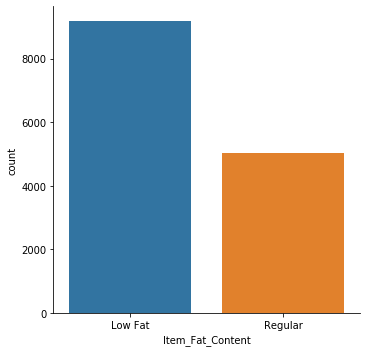

In [17]:
sns.catplot('Item_Fat_Content',kind = 'count',data = data)

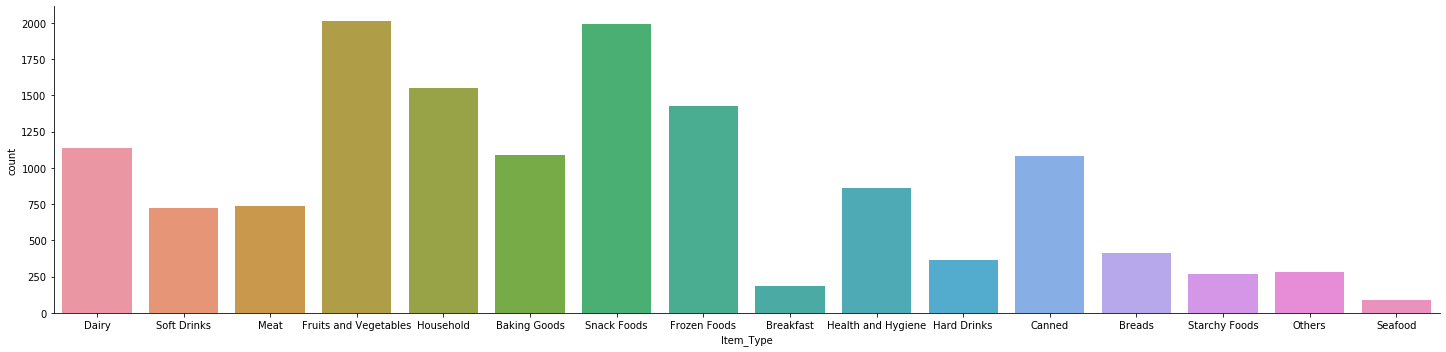

In [18]:
sns.catplot('Item_Type',kind = 'count',data = data,aspect =4)

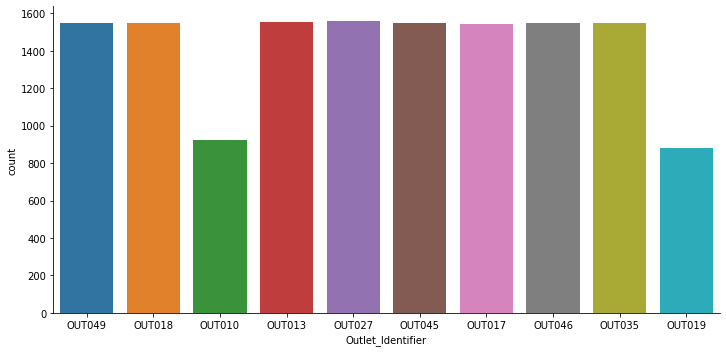

In [19]:
sns.catplot('Outlet_Identifier',kind = 'count',data = data,aspect = 2)

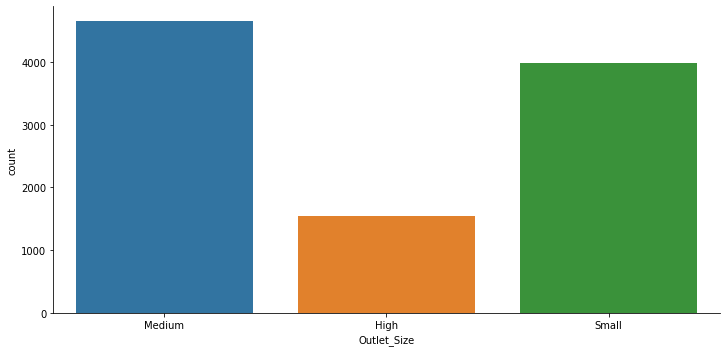

In [20]:
sns.catplot('Outlet_Size',kind = 'count',data = data,aspect = 2)

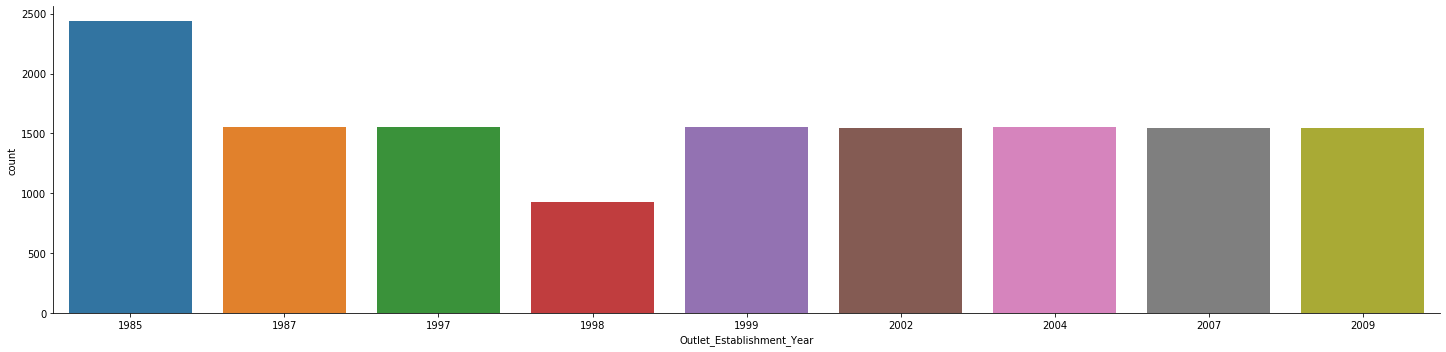

In [21]:
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = data,aspect =4)

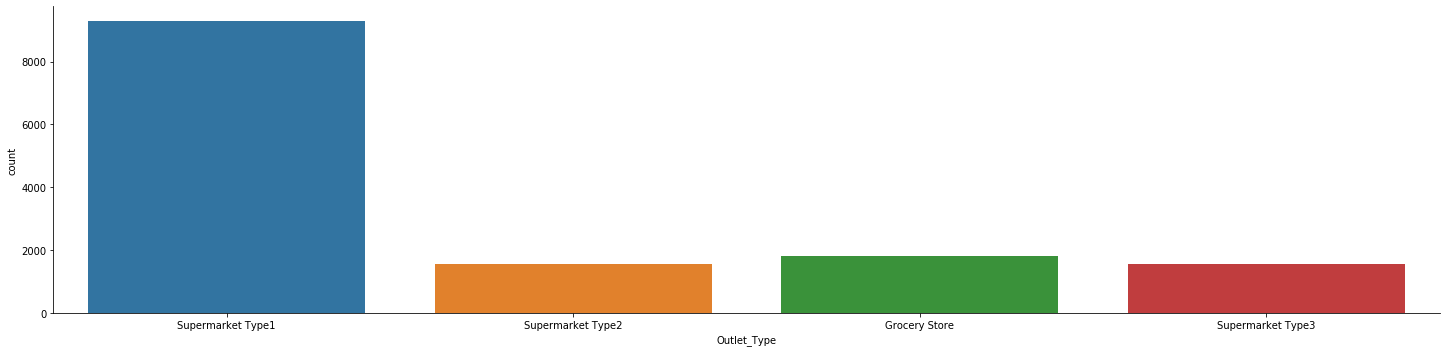

In [22]:
sns.catplot('Outlet_Type',kind = 'count',data = data,aspect =4)

### Observations

Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years.
Supermarket Type 1 seems to be the most popular category of Outlet_Type.


###  Continuous variable and Continuous variable Analysis

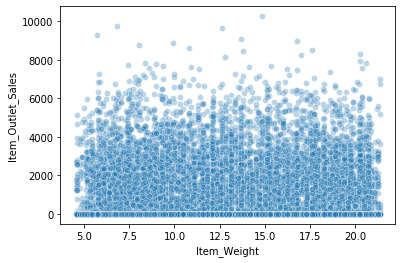

In [23]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = data,alpha = 0.3);

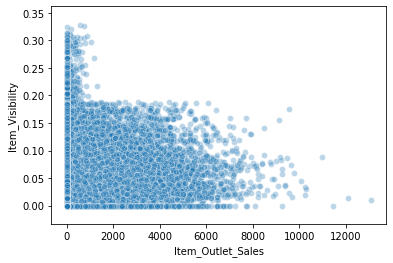

In [24]:
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = data,alpha = 0.3)

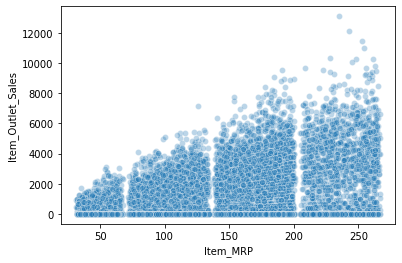

In [25]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = data,alpha = 0.3)

### Observations

Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.
In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages.
In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.


### Categorical Variables vs Categorical Variables Analysis

In [26]:
#two way table

pd.crosstab(data['Outlet_Location_Type'], data['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,880,3100,0,0
Tier 2,0,4641,0,0
Tier 3,925,1553,1546,1559


### Catigorical variable vs Continuous Variable analysis

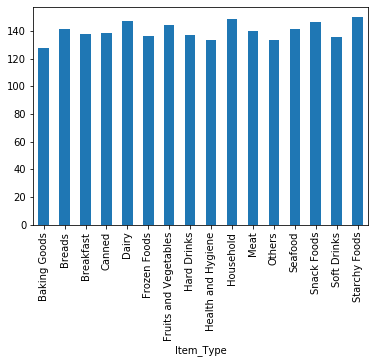

In [27]:
# Bar-plot

data.groupby('Item_Type')['Item_MRP'].mean().plot.bar()

## T-test

T-Test as an a two sample (or unpaired) t-test. It produces a 'p-value',which can be used to decide wheather there is  
evidence of a difference between two population means. The p-value is the probability that the difference between the sample
mean is at least as large as what has been observed. The smaller p-value the stronger the evidence that the mean of two 
population is different

## Null hypothesis

The mean of Outlet sales with high fat and outlet sale of item regular fate are equal

In [28]:
#importing the scipy library for ttest

from scipy.stats import ttest_ind
import numpy as np

In [29]:
this_yes = data[data["Item_Fat_Content"]=='Regular']

In [30]:
this_no = data[data["Item_Fat_Content"]=='Low Fat']

In [31]:
# 2 sample ttest

_,p_value=ttest_ind(this_yes['Item_Outlet_Sales'],this_no['Item_Outlet_Sales'],nan_policy='omit')

In [32]:
if p_value<0.05:
    print("REJECT NULL HYPOTHESIS")
else:
    print("ACCEPT NULL HYPOTHESIS")

ACCEPT NULL HYPOTHESIS


### Missing Data Treatment

Missing data can have a severe impact on building predictive models because the missing values might be contain some vital information which could help in making better predictions. So, it becomes imperative to carry out missing data imputation. There are different methods to treat missing values based on the problem and the data. Some of the common techniques are as follows:

<ul><b> 1) Deletion of rows</b>: In train dataset, observations having missing values in any variable are deleted. The downside of this method is the loss of information and drop in prediction power of model.

<b> 2) Mean/Median/Mode Imputation</b>: In case of continuous variable, missing values can be replaced with mean or median of all known values of that variable. For categorical variables, we can use mode of the given values to replace the missing values.


In [34]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

### Imputing Missing Value
As you can see above, we have missing values in Item_Weight and Outlet_Size. We’ll now impute Item_Weight with mean weight.

In [35]:
from sklearn.preprocessing import LabelEncoder
l_enc  = LabelEncoder()
a = l_enc.fit_transform(train['Item_Identifier'])

In [36]:
train['Item_Weight'].fillna(a.mean(),inplace = True)

In [37]:
train.Item_Weight.isna().sum()

0

In [38]:
train['Outlet_Size'].fillna('Small',inplace  = True)

In [39]:
train['Outlet_Size'].isna().sum()

0

0 missing values! It means we have successfully imputed the missing data in the feature.

### Replacing 0’s in Item_Visibility variable


Similarly, zeroes in Item_Visibility variable can be replaced with Item_Visibility wise mean values. It can be visualized in the plot below.

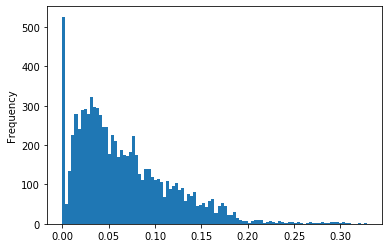

In [40]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

Let’s replace the zeroes.


In [41]:
train.shape

(8523, 13)

In [42]:
a= train[train['Item_Visibility']!=0]['Item_Visibility'].mean()

In [43]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,a)

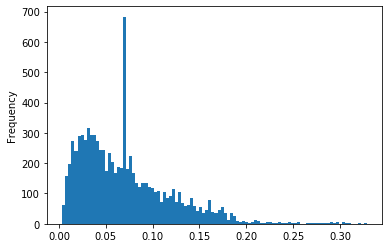

In [44]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

### Feature Engineering

Most of the times, the given features in a dataset are not sufficient to give satisfactory predictions. In such cases, we have to create new features which might help in improving the model’s performance. Let’s try to create some new features for our dataset.

In this section we will create the following new features:

<ul><li>Item_Type_new: Broader categories for the variable Item_Type.</li>
<li>Item_category: Categorical variable derived from Item_Identifier.</li>
<li>Outlet_Years: Years of operation for outlets.</li>
<li>price_per_unit_wt: Item_MRP/Item_Weight</li>
<li>Item_MRP_clusters: Binned feature for Item_MRP.</li></ul>


We can have a look at the Item_Type variable and classify the c
ategories into perishable and non_perishable as per our understanding and make it into a new feature.

In [ ]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

create a new feature 'Item_Type_new' 

In [ ]:
item_list =[] 
for i in train['Item_Type']:
    if i in perishable:
        item_list.append('perishable')
    elif (i in non_perishable):
        item_list.append('non_perishable')
    else:
        item_list.append('not_sure')
        
train['Item_Type_new'] = item_list

In [ ]:
train['Item_Category'] =train['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR','^FD[A-Z]*[0-9]*':'FD','^NC[A-Z]*[0-9]*':'NC'},regex = True)

In [ ]:
Food=pd.crosstab(train['Item_Type'],train['Item_Category'])
Food

We will also change the values of Item_Fat_Content wherever Item_category is ‘NC’ because non-consumable items cannot have any fat content. We will also create a couple of more features — Outlet_Years (years of operation) and price_per_unit_wt (price per unit weight).

In [ ]:
train['Item_Fat_Content'][(train['Item_Category']=='NC')]='Non Edible'

In [ ]:
train['Item_Fat_Content'].unique()

In [ ]:
train['Outlet_Years'] = 2019-train['Outlet_Establishment_Year']

In [ ]:
train['Price_Per_Unit_Weight'] = train['Item_MRP']/train['Item_Weight']

Earlier in the Item_MRP vs Item_Outlet_Sales plot, we saw Item_MRP was spread across in 4 chunks. Now let’s assign a label to each of these chunks and use this label as a new variable.

In [ ]:
def clusters(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'
train['Item_MRP_Clusters'] = train['Item_MRP'].astype('int').apply(clusters)
train.head()

In [ ]:
train['Item_MRP_Clusters'].unique()

### Encoding Categorical Variables

Most of the machine learning algorithms produce better result with numerical variables only. So, it is essential to treat the categorical variables present in the data. One thing that can be done is to completely remove the categorical variables, but that would lead to enormous loss of information. Fortunately we have smarter techniques to deal with the categorical variables.

In this stage, we will convert our categorical variables into numerical ones. We will use 2 techniques — Label Encoding and One Hot Encoding.

<ul><b>1). Label encoding </b>simply means converting each category in a variable to a number. It is more suitable for ordinal variables — categorical variables with some order.</ul>

<ul><b>2). In One hot encoding</b>, each category of a categorical variable is converted into a new binary column (1/0).</ul>



### Label encoding for the categorical variables

We will label encode Outlet_Size and Outlet_Location_Type as these are ordinal variables.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# a = ['Outlet_Size','Outlet_Location_Type']
le = LabelEncoder()
train['Outlet_Size']= le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_MRP_Clusters'] = le.fit_transform(train['Item_MRP_Clusters'])

### One hot encoding for the categorical variable

In [ ]:
train.info()

In [ ]:
#train['Outlet_Identifier'].unique(),train['Item_Identifier'].unique(),train['Item_Type'].unique()
a = pd.get_dummies(train[['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category']])
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category','source'],axis = 1 )
train = pd.concat([train,a],axis = 1)

#### What is Data PreProcessing?


In simple words, pre-processing refers to the transformations applied to your data before feeding it to the algorithm. It invloves further cleaning of data, data transformation, data scaling and many more things.

For our data, we will deal with the skewness and scale the numerical variables

#### Removing Skewness

Skewness in variables is undesirable for predictive modeling. Some machine learning methods assume normally distributed data and a skewed variable can be transformed by taking its log, square root, or cube root so as to make its distribution as close to normal distribution as possible. In our data, variables Item_Visibility and price_per_unit_wt are highly skewed. So, we will treat their skewness with the help of log transformation.

In [ ]:
train['Price_Per_Unit_Weight'] = np.log(train['Price_Per_Unit_Weight'])
train['Item_Visibility'] = np.log(train['Item_Visibility'])

#### Correlated Variables
Let’s examine the correlated features of train dataset. Correlation varies from -1 to 1.

<ul> 1). negative correlation: < 0 and >= -1 </ul>
<ul> 2). positive correlation: > 0 and <= 1</ul>
<ul> 3). no correlation: 0

In [ ]:
corr=train.corr()
corr

The correlation plot above shows correlation between all the possible pairs of variables in out data. The correlation between any two variables is represented with a number. a positive number represents positive correlation and negative number indicates negative correlation.

Variables price_per_unit_wt and Item_Weight are highly correlated as the former one was created from the latter. Similarly price_per_unit_wt and Item_MRP are highly correlated for the same reason.

In [ ]:
train.plot.scatter('Item_MRP','Item_Outlet_Sales',)


In [ ]:
x=data.sample(200)
ax=x['Item_MRP']
ay=x['Item_Outlet_Sales']
sns.regplot(ax,ay,color='b',data=train)  

### Model Building


<ul><li>Linear Regression</li></ul>

####  Evaluation Metrics for Regression

The process of model building is not complete without evaluation of model’s performance. That’s why we need an evaluation metric to evaluate our model. Since this is a regression problem, we can evaluate our models using any one of the following evaluation metrics:



<b>Mean Absolute Error (MAE)</b> is the mean of the absolute value of the errors:

### Linear Regression

#### Building Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales']

### Train - Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 8)

In [ ]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

In [ ]:
X_train.head()

In [ ]:
model = LinearRegression(normalize=True,fit_intercept= True)

In [ ]:
# fit final model
model.fit(X,y)

In [ ]:
y_pred = model.predict(X_valid)

In [ ]:
model.score(X_train,y_train),model.score(X_valid,y_valid)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mean_squared_error(y_valid, y_pred),mean_absolute_error(y_valid, y_pred)

# ANOVA

In [ ]:
#Analysis of variance
#one way anova


import statsmodels.api as sm

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
lm = ols('Outlet_Establishment_Year ~ Outlet_Size',data=test).fit()

In [ ]:
table = sm.stats.anova_lm(lm)
print(table)

In [ ]:
sm.stats.anova_lm(lm).plot.bar()